2020 USPS Vacant Building Data

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
# Store filepath in a variable for each quarter  (data is from https://www.huduser.gov/apps/public/usps/home and is collected quarterly)
data_2021Q4 = "Resources/usps_vac_2021Q4.csv"
vac_2021Q4_df = pd.read_csv(data_2021Q4)
vac_2021Q4_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_36_oth,N,16,0","pqns_is_r,N,16,0","pqns_is_b,N,16,0","pqns_is_o,N,16,0","new_addr_r,N,16,0","new_addr_b,N,16,0","new_addr_o,N,16,0","drop_add_r,N,16,0","drop_add_b,N,16,0","drop_add_o,N,16,0"
0,72011810400,7881,447,52,227,106,0,1979.33,2637.28,0.0,...,0,1,0,0,15,0,0,89,14,0
1,72023830503,1332,36,6,77,6,0,2806.16,4581.17,0.0,...,0,0,0,0,0,0,0,292,11,0
2,72051540200,1819,174,35,175,22,0,1892.67,3523.05,0.0,...,0,3,0,0,0,0,0,145,8,0
3,72071410200,1357,36,20,117,5,0,3121.80,2676.60,0.0,...,0,0,0,0,2,0,0,153,6,0
4,72091570600,1054,80,10,54,9,0,1673.02,1950.78,0.0,...,0,1,0,0,0,0,0,111,10,0


In [3]:
data_2021Q3 = "Resources/usps_vac_2021Q3.csv"
vac_2021Q3_df = pd.read_csv(data_2021Q3)
vac_2021Q3_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_36_oth,N,16,0","pqns_is_r,N,16,0","pqns_is_b,N,16,0","pqns_is_o,N,16,0","NEW_ADDR_R,N,16,0","NEW_ADDR_B,N,16,0","NEW_ADDR_O,N,16,0","DROP_ADD_R,N,16,0","DROP_ADD_B,N,16,0","DROP_ADD_O,N,16,0"
0,72013301000,1709,37,14,120,6,0,2553.90,2602.50,0.0,...,0,1,0,0,0,0,0,269,4,0
1,72027320401,7937,257,14,80,8,0,4109.10,4245.13,0.0,...,0,1,0,0,6,0,0,51,28,0
2,72055961300,5179,239,89,318,50,0,2050.04,3068.38,0.0,...,0,8,0,0,1,0,0,51,14,0
3,72117959600,1160,87,52,68,2,0,1660.00,2211.50,0.0,...,0,0,0,0,0,0,0,73,2,0
4,72091570202,1048,21,0,66,2,0,2053.17,1135.00,0.0,...,0,1,0,0,1,0,0,109,0,0


In [4]:
data_2021Q2 = "Resources/usps_vac_2021Q2.csv"
vac_2021Q2_df = pd.read_csv(data_2021Q2)
vac_2021Q2_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_36_oth,N,16,0","pqns_is_r,N,16,0","pqns_is_b,N,16,0","pqns_is_o,N,16,0","new_addr_r,N,16,0","new_addr_b,N,16,0","new_addr_o,N,16,0","drop_add_r,N,16,0","drop_add_b,N,16,0","drop_add_o,N,16,0"
0,72027320401,7931,256,14,79,7,0,4122.99,4756.86,0.0,...,0,0,0,0,0,0,0,51,28,0
1,72039955800,3352,50,8,99,3,0,1954.73,2437.33,0.0,...,0,1,0,0,3,0,0,2089,48,0
2,72055961300,5178,239,89,315,51,0,2077.66,2926.25,0.0,...,0,0,0,0,0,0,0,51,14,0
3,72117959600,1160,87,52,68,2,0,1569.00,2120.50,0.0,...,0,0,0,0,0,0,0,73,2,0
4,72097080400,2202,388,22,122,18,0,4207.05,2784.44,0.0,...,0,0,0,0,0,0,0,55,2,0


In [5]:
data_2021Q1 = "Resources/usps_vac_2021Q1.csv"
vac_2021Q1_df = pd.read_csv(data_2021Q1)
vac_2021Q1_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_36_oth,N,16,0","pqns_is_r,N,16,0","pqns_is_b,N,16,0","pqns_is_o,N,16,0","NEW_ADDR_R,N,16,0","NEW_ADDR_B,N,16,0","NEW_ADDR_O,N,16,0","DROP_ADD_R,N,16,0","DROP_ADD_B,N,16,0","DROP_ADD_O,N,16,0"
0,72001956700,3769,175,75,217,31,0,2875.84,3905.19,0.0,...,0,0,0,0,0,0,0,50,3,0
1,72003430300,2717,383,81,38,34,0,3367.37,4471.88,0.0,...,0,4,1,0,0,1,0,179,21,0
2,72011810300,542,50,17,32,10,0,1835.84,2096.90,0.0,...,0,0,0,0,0,0,0,49,0,0
3,72011810500,896,26,2,76,2,0,1845.53,1885.50,0.0,...,0,0,0,0,0,0,0,10,0,0
4,72093960100,41,3,0,6,0,0,3842.50,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# create dataframe to use as a key to match geoids with commercial corridors (key created using ArcGIS)
key = "Resources/corr_key.csv"
corr_key_df = pd.read_csv(key)
corr_key_df

,GEOID,Corridor
0,24510260403,Highlandtown
1,24510230200,Hamilton Lauraville
2,24510260102,Pimlico
3,24510260303,Hamilton Lauraville
4,24510260800,Highlandtown
...,...,...
195,24510220100,NaN
196,24510230300,NaN
197,24510250207,NaN
198,24510250303,NaN


In [7]:
# Check the number of rows and columns for the dataframes
vac_2021Q4_df.shape

(65535, 67)

In [8]:
vac_2021Q3_df.shape

(65535, 67)

In [9]:
# Q4
# Remove rows that do not include Baltimore GEOID ("24510....); Baltimore FIPS  is 24, Baltimore FIPS is 510, rest of the geoid is census tract #
# inclusive=True means to include the numbers 24510000000 and 24510999999
balt_2021Q4_df = vac_2021Q4_df[vac_2021Q4_df["geoid,C,11"].between(24510000000, 24510999999, inclusive=True)]
balt_2021Q4_df

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_36_oth,N,16,0","pqns_is_r,N,16,0","pqns_is_b,N,16,0","pqns_is_o,N,16,0","new_addr_r,N,16,0","new_addr_b,N,16,0","new_addr_o,N,16,0","drop_add_r,N,16,0","drop_add_b,N,16,0","drop_add_o,N,16,0"
666,24510170200,1854,196,157,186,8,0,2837.91,937.75,0.0,...,0,0,1,0,0,0,0,6,35,0
668,24510090100,1880,31,146,166,2,0,1942.54,1963.00,0.0,...,0,0,0,0,0,0,0,24,2,0
669,24510140100,3018,97,405,63,1,0,2257.46,182.00,0.0,...,0,0,0,0,0,0,0,235,2,0
670,24510090500,1425,203,94,101,11,0,2754.80,2959.64,0.0,...,0,0,0,0,0,0,0,29,33,0
671,24510270600,1968,91,126,86,8,0,2109.03,3057.38,0.0,...,0,0,0,0,0,0,0,40,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64975,24510080101,1398,90,65,127,27,0,1302.03,1673.89,0.0,...,0,0,0,0,1,0,0,2,3,0
64976,24510060200,1521,48,24,105,6,0,1278.22,1370.33,0.0,...,0,0,0,0,0,0,0,10,2,0
64979,24510270803,3816,345,280,92,12,0,646.90,2887.33,0.0,...,0,0,0,0,0,0,0,0,0,0
64980,24510030100,1339,212,123,273,23,0,835.92,2654.70,0.0,...,0,0,0,0,0,0,0,39,24,0


In [10]:
# Check again to see how many rows after deleting other census tracts from the dataframe
balt_2021Q4_df.shape

(184, 67)

In [11]:
# Q3
# Remove rows that do not include Baltimore GEOID ("24510....); Baltimore FIPS  is 24, Baltimore FIPS is 510, rest of the geoid is census tract #
balt_2021Q3_df = vac_2021Q3_df[vac_2021Q3_df["geoid,C,11"].between(24510000000, 24510999999, inclusive=True)]
balt_2021Q3_df

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_36_oth,N,16,0","pqns_is_r,N,16,0","pqns_is_b,N,16,0","pqns_is_o,N,16,0","NEW_ADDR_R,N,16,0","NEW_ADDR_B,N,16,0","NEW_ADDR_O,N,16,0","DROP_ADD_R,N,16,0","DROP_ADD_B,N,16,0","DROP_ADD_O,N,16,0"
700,24510040100,5795,4516,572,100,656,0,1479.04,2956.40,0.0,...,0,0,3,0,0,3,0,28,88,0
701,24510280200,1810,78,315,171,10,0,2480.19,4082.10,0.0,...,0,0,0,0,0,0,0,18,6,0
704,24510272003,2236,36,336,20,1,0,1822.90,1507.00,0.0,...,0,0,0,0,1,0,0,3,4,0
706,24510271200,2389,208,144,44,31,0,1881.52,1708.03,0.0,...,0,0,0,0,0,0,0,2,7,0
707,24510130200,1318,30,448,120,12,0,2091.63,347.58,0.0,...,0,3,0,0,3,0,0,68,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64996,24510140100,3013,97,405,59,1,0,2307.47,83.00,0.0,...,0,1,0,0,22,0,0,235,2,0
64997,24510090100,1880,31,146,166,2,0,1822.84,1864.00,0.0,...,0,0,0,0,0,0,0,24,2,0
64998,24510090500,1428,200,94,99,11,0,2729.74,2860.64,0.0,...,0,0,0,0,0,0,0,29,33,0
65001,24510230100,1540,245,132,47,10,0,1465.77,2242.20,0.0,...,0,0,0,0,0,0,0,42,9,0


In [12]:
balt_2021Q3_df.shape

(182, 67)

In [13]:
# Q2
# Remove rows that do not include Baltimore GEOID ("24510....); Baltimore FIPS  is 24, Baltimore FIPS is 510, rest of the geoid is census tract #
balt_2021Q2_df = vac_2021Q2_df[vac_2021Q2_df["geoid,C,11"].between(24510000000, 24510999999, inclusive=True)]
balt_2021Q2_df

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_36_oth,N,16,0","pqns_is_r,N,16,0","pqns_is_b,N,16,0","pqns_is_o,N,16,0","new_addr_r,N,16,0","new_addr_b,N,16,0","new_addr_o,N,16,0","drop_add_r,N,16,0","drop_add_b,N,16,0","drop_add_o,N,16,0"
689,24510040100,5796,4529,570,108,655,0,1457.79,2905.81,0.0,...,0,0,3,0,0,0,0,28,101,0
693,24510271700,2343,160,151,264,11,0,2305.60,4041.36,0.0,...,0,0,0,0,0,0,0,19,202,0
695,24510271200,2389,208,144,45,32,0,1778.80,1587.28,0.0,...,0,0,0,0,1,0,0,2,7,0
696,24510280200,1810,78,315,173,10,0,2411.54,3991.10,0.0,...,0,0,0,0,0,0,0,18,6,0
697,24510272003,2235,36,336,21,1,0,1663.10,1416.00,0.0,...,0,0,0,0,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73116,24510060200,1521,48,24,132,8,0,1872.54,1293.38,0.0,...,0,0,0,0,0,0,0,10,2,0
73117,24510010200,1678,36,14,37,7,0,1169.24,3484.71,0.0,...,0,0,0,0,1,0,0,0,2,0
73280,24510250102,1259,13,67,47,0,0,1234.79,0.00,0.0,...,0,0,0,0,0,0,0,0,8,0
73350,24510080101,1397,90,65,159,32,0,1306.62,1703.78,0.0,...,0,0,0,0,0,0,0,2,3,0


In [14]:
balt_2021Q2_df.shape

(200, 67)

In [15]:
# Q1
# Remove rows that do not include Baltimore GEOID ("24510....); Baltimore FIPS  is 24, Baltimore FIPS is 510, rest of the geoid is census tract #
balt_2021Q1_df = vac_2021Q1_df[vac_2021Q1_df["geoid,C,11"].between(24510000000, 24510999999, inclusive=True)]
balt_2021Q1_df

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_36_oth,N,16,0","pqns_is_r,N,16,0","pqns_is_b,N,16,0","pqns_is_o,N,16,0","NEW_ADDR_R,N,16,0","NEW_ADDR_B,N,16,0","NEW_ADDR_O,N,16,0","DROP_ADD_R,N,16,0","DROP_ADD_B,N,16,0","DROP_ADD_O,N,16,0"
3062,24510130803,1428,27,110,32,2,0,1057.69,2819.00,0.0,...,0,8,0,0,0,0,0,6,0,0
3063,24510151200,2019,31,55,300,4,0,2394.59,2690.00,0.0,...,0,3,0,0,0,0,0,16,4,0
3066,24510130600,2566,538,166,91,27,0,1317.57,1579.78,0.0,...,0,0,0,0,0,0,0,17,12,0
3067,24510280302,1132,5,211,73,1,0,1403.49,447.00,0.0,...,0,0,0,0,0,0,0,15,0,0
3069,24510151300,2068,146,113,382,27,0,2825.71,2681.67,0.0,...,0,2,0,0,0,0,0,4,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70168,24510090500,1423,205,94,107,11,0,2502.38,2532.73,0.0,...,0,0,0,0,0,0,0,29,33,0
72053,24510272004,2012,15,281,25,1,0,1164.44,4018.00,0.0,...,0,0,0,0,0,0,0,0,0,0
72668,24510080500,839,52,20,119,6,0,1749.91,2309.83,0.0,...,0,2,0,0,0,0,0,0,7,0
72947,24510250203,890,24,74,63,0,0,1956.97,0.00,0.0,...,0,0,0,0,0,0,0,0,2,0


In [16]:
balt_2021Q1_df.shape

(200, 67)

In [17]:
# print all of the column names for the balt_2020Q4_df dataframe
for col in balt_2021Q4_df.columns:
    print(col)

geoid,C,11
ams_res,N,16,0
ams_bus,N,16,0
ams_oth,N,16,0
res_vac,N,16,0
bus_vac,N,16,0
oth_vac,N,16,0
avg_vac_r,N,16,2
avg_vac_b,N,16,2
avg_vac_o,N,16,2
vac_3_res,N,16,0
vac_3_bus,N,16,0
vac_3_oth,N,16,0
vac_3_6_r,N,16,0
vac_3_6_b,N,16,0
vac_3_6_o,N,16,0
vac_6_12r,N,16,0
vac_6_12b,N,16,0
vac_6_12o,N,16,0
vac_12_24r,N,16,0
vac_12_24b,N,16,0
vac_12_24o,N,16,0
vac_24_36r,N,16,0
vac_24_36b,N,16,0
vac_24_36o,N,16,0
vac_36_res,N,16,0
vac_36_bus,N,16,0
vac_36_oth,N,16,0
pqv_is_res,N,16,0
pqv_is_bus,N,16,0
pqv_is_oth,N,16,0
pqv_ns_res,N,16,0
pqv_ns_bus,N,16,0
pqv_ns_oth,N,16,0
nostat_res,N,16,0
nostat_bus,N,16,0
nostat_oth,N,16,0
avg_ns_res,N,16,2
avg_ns_bus,N,16,2
avg_ns_oth,N,16,2
ns_3_res,N,16,0
ns_3_bus,N,16,0
ns_3_oth,N,16,0
ns_3_6_res,N,16,0
ns_3_6_bus,N,16,0
ns_3_6_oth,N,16,0
ns_6_12_r,N,16,0
ns_6_12_b,N,16,0
ns_6_12_o,N,16,0
ns_12_24_r,N,16,0
ns_12_24_b,N,16,0
ns_12_24_o,N,16,0
ns_24_36_r,N,16,0
ns_24_36_b,N,16,0
ns_24_36_o,N,16,0
ns_36_res,N,16,0
ns_36_bus,N,16,0
ns_36_oth,N,16,0
pqns_

In [18]:
# Q4
# remove columns that aren't going to be analyzed
balt_2021Q4_df = balt_2021Q4_df.drop(["pqv_is_res,N,16,0", "pqv_is_bus,N,16,0", "pqv_is_oth,N,16,0",
                                 "pqv_ns_res,N,16,0", "pqv_ns_bus,N,16,0", "pqv_ns_oth,N,16,0",
                                 "pqns_is_r,N,16,0", "pqns_is_b,N,16,0", "pqns_is_o,N,16,0",
                                  ],
                                  axis=1)
balt_2021Q4_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_24_36_o,N,16,0","ns_36_res,N,16,0","ns_36_bus,N,16,0","ns_36_oth,N,16,0","new_addr_r,N,16,0","new_addr_b,N,16,0","new_addr_o,N,16,0","drop_add_r,N,16,0","drop_add_b,N,16,0","drop_add_o,N,16,0"
666,24510170200,1854,196,157,186,8,0,2837.91,937.75,0.0,...,0,73,122,0,0,0,0,6,35,0
668,24510090100,1880,31,146,166,2,0,1942.54,1963.00,0.0,...,0,47,1,0,0,0,0,24,2,0
669,24510140100,3018,97,405,63,1,0,2257.46,182.00,0.0,...,0,366,27,0,0,0,0,235,2,0
670,24510090500,1425,203,94,101,11,0,2754.80,2959.64,0.0,...,0,628,127,0,0,0,0,29,33,0
671,24510270600,1968,91,126,86,8,0,2109.03,3057.38,0.0,...,0,36,19,0,0,0,0,40,10,0


In [19]:
# I printed the column names for each dataset because the codes may vary from quarter to quarter or year to year 
for col in balt_2021Q3_df.columns:
    print(col)

geoid,C,11
ams_res,N,16,0
ams_bus,N,16,0
ams_oth,N,16,0
res_vac,N,16,0
bus_vac,N,16,0
oth_vac,N,16,0
avg_vac_r,N,16,2
avg_vac_b,N,16,2
avg_vac_o,N,16,2
vac_3_res,N,16,0
vac_3_bus,N,16,0
vac_3_oth,N,16,0
vac_3_6_r,N,16,0
vac_3_6_b,N,16,0
vac_3_6_o,N,16,0
vac_6_12r,N,16,0
vac_6_12b,N,16,0
vac_6_12o,N,16,0
vac_12_24r,N,16,0
vac_12_24b,N,16,0
vac_12_24o,N,16,0
vac_24_36r,N,16,0
vac_24_36b,N,16,0
vac_24_36o,N,16,0
vac_36_res,N,16,0
vac_36_bus,N,16,0
vac_36_oth,N,16,0
pqv_is_res,N,16,0
pqv_is_bus,N,16,0
pqv_is_oth,N,16,0
pqv_ns_res,N,16,0
pqv_ns_bus,N,16,0
pqv_ns_oth,N,16,0
nostat_res,N,16,0
nostat_bus,N,16,0
nostat_oth,N,16,0
avg_ns_res,N,16,2
avg_ns_bus,N,16,2
avg_ns_oth,N,16,2
ns_3_res,N,16,0
ns_3_bus,N,16,0
ns_3_oth,N,16,0
ns_3_6_res,N,16,0
ns_3_6_bus,N,16,0
ns_3_6_oth,N,16,0
ns_6_12_r,N,16,0
ns_6_12_b,N,16,0
ns_6_12_o,N,16,0
ns_12_24_r,N,16,0
ns_12_24_b,N,16,0
ns_12_24_o,N,16,0
ns_24_36_r,N,16,0
ns_24_36_b,N,16,0
ns_24_36_o,N,16,0
ns_36_res,N,16,0
ns_36_bus,N,16,0
ns_36_oth,N,16,0
pqns_

In [20]:
# Q3
# remove columns that aren't going to be analyzed
balt_2021Q3_df = balt_2021Q3_df.drop(["pqv_is_res,N,16,0", "pqv_is_bus,N,16,0", "pqv_is_oth,N,16,0",
                                 "pqv_ns_res,N,16,0", "pqv_ns_bus,N,16,0", "pqv_ns_oth,N,16,0",
                                 "pqns_is_r,N,16,0", "pqns_is_b,N,16,0", "pqns_is_o,N,16,0",
                                 ],
                                  axis=1)
balt_2021Q3_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_24_36_o,N,16,0","ns_36_res,N,16,0","ns_36_bus,N,16,0","ns_36_oth,N,16,0","NEW_ADDR_R,N,16,0","NEW_ADDR_B,N,16,0","NEW_ADDR_O,N,16,0","DROP_ADD_R,N,16,0","DROP_ADD_B,N,16,0","DROP_ADD_O,N,16,0"
700,24510040100,5795,4516,572,100,656,0,1479.04,2956.40,0.0,...,0,299,1781,0,0,3,0,28,88,0
701,24510280200,1810,78,315,171,10,0,2480.19,4082.10,0.0,...,0,45,10,0,0,0,0,18,6,0
704,24510272003,2236,36,336,20,1,0,1822.90,1507.00,0.0,...,0,53,7,0,1,0,0,3,4,0
706,24510271200,2389,208,144,44,31,0,1881.52,1708.03,0.0,...,0,20,26,0,0,0,0,2,7,0
707,24510130200,1318,30,448,120,12,0,2091.63,347.58,0.0,...,0,208,8,0,3,0,0,68,5,0


In [21]:
for col in balt_2021Q2_df.columns:
    print(col)

geoid,C,11
ams_res,N,16,0
ams_bus,N,16,0
ams_oth,N,16,0
res_vac,N,16,0
bus_vac,N,16,0
oth_vac,N,16,0
avg_vac_r,N,16,2
avg_vac_b,N,16,2
avg_vac_o,N,16,2
vac_3_res,N,16,0
vac_3_bus,N,16,0
vac_3_oth,N,16,0
vac_3_6_r,N,16,0
vac_3_6_b,N,16,0
vac_3_6_o,N,16,0
vac_6_12r,N,16,0
vac_6_12b,N,16,0
vac_6_12o,N,16,0
vac_12_24r,N,16,0
vac_12_24b,N,16,0
vac_12_24o,N,16,0
vac_24_36r,N,16,0
vac_24_36b,N,16,0
vac_24_36o,N,16,0
vac_36_res,N,16,0
vac_36_bus,N,16,0
vac_36_oth,N,16,0
pqv_is_res,N,16,0
pqv_is_bus,N,16,0
pqv_is_oth,N,16,0
pqv_ns_res,N,16,0
pqv_ns_bus,N,16,0
pqv_ns_oth,N,16,0
nostat_res,N,16,0
nostat_bus,N,16,0
nostat_oth,N,16,0
avg_ns_res,N,16,2
avg_ns_bus,N,16,2
avg_ns_oth,N,16,2
ns_3_res,N,16,0
ns_3_bus,N,16,0
ns_3_oth,N,16,0
ns_3_6_res,N,16,0
ns_3_6_bus,N,16,0
ns_3_6_oth,N,16,0
ns_6_12_r,N,16,0
ns_6_12_b,N,16,0
ns_6_12_o,N,16,0
ns_12_24_r,N,16,0
ns_12_24_b,N,16,0
ns_12_24_o,N,16,0
ns_24_36_r,N,16,0
ns_24_36_b,N,16,0
ns_24_36_o,N,16,0
ns_36_res,N,16,0
ns_36_bus,N,16,0
ns_36_oth,N,16,0
pqns_

In [22]:
# Q2
# remove columns that aren't going to be analyzed
balt_2021Q2_df = balt_2021Q2_df.drop(["pqv_is_res,N,16,0", "pqv_is_bus,N,16,0", "pqv_is_oth,N,16,0",
                                 "pqv_ns_res,N,16,0", "pqv_ns_bus,N,16,0", "pqv_ns_oth,N,16,0",
                                 "pqns_is_r,N,16,0", "pqns_is_b,N,16,0", "pqns_is_o,N,16,0",
                                  ],
                                  axis=1)
balt_2021Q2_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_24_36_o,N,16,0","ns_36_res,N,16,0","ns_36_bus,N,16,0","ns_36_oth,N,16,0","new_addr_r,N,16,0","new_addr_b,N,16,0","new_addr_o,N,16,0","drop_add_r,N,16,0","drop_add_b,N,16,0","drop_add_o,N,16,0"
689,24510040100,5796,4529,570,108,655,0,1457.79,2905.81,0.0,...,0,299,1786,0,0,0,0,28,101,0
693,24510271700,2343,160,151,264,11,0,2305.60,4041.36,0.0,...,0,72,31,0,0,0,0,19,202,0
695,24510271200,2389,208,144,45,32,0,1778.80,1587.28,0.0,...,0,20,26,0,1,0,0,2,7,0
696,24510280200,1810,78,315,173,10,0,2411.54,3991.10,0.0,...,0,45,10,0,0,0,0,18,6,0
697,24510272003,2235,36,336,21,1,0,1663.10,1416.00,0.0,...,0,53,7,0,0,0,0,3,4,0


In [23]:
for col in balt_2021Q1_df.columns:
    print(col)

geoid,C,11
ams_res,N,16,0
ams_bus,N,16,0
ams_oth,N,16,0
res_vac,N,16,0
bus_vac,N,16,0
oth_vac,N,16,0
avg_vac_r,N,16,2
avg_vac_b,N,16,2
avg_vac_o,N,16,2
vac_3_res,N,16,0
vac_3_bus,N,16,0
vac_3_oth,N,16,0
vac_3_6_r,N,16,0
vac_3_6_b,N,16,0
vac_3_6_o,N,16,0
vac_6_12r,N,16,0
vac_6_12b,N,16,0
vac_6_12o,N,16,0
vac_12_24r,N,16,0
vac_12_24b,N,16,0
vac_12_24o,N,16,0
vac_24_36r,N,16,0
vac_24_36b,N,16,0
vac_24_36o,N,16,0
vac_36_res,N,16,0
vac_36_bus,N,16,0
vac_36_oth,N,16,0
pqv_is_res,N,16,0
pqv_is_bus,N,16,0
pqv_is_oth,N,16,0
pqv_ns_res,N,16,0
pqv_ns_bus,N,16,0
pqv_ns_oth,N,16,0
nostat_res,N,16,0
nostat_bus,N,16,0
nostat_oth,N,16,0
avg_ns_res,N,16,2
avg_ns_bus,N,16,2
avg_ns_oth,N,16,2
ns_3_res,N,16,0
ns_3_bus,N,16,0
ns_3_oth,N,16,0
ns_3_6_res,N,16,0
ns_3_6_bus,N,16,0
ns_3_6_oth,N,16,0
ns_6_12_r,N,16,0
ns_6_12_b,N,16,0
ns_6_12_o,N,16,0
ns_12_24_r,N,16,0
ns_12_24_b,N,16,0
ns_12_24_o,N,16,0
ns_24_36_r,N,16,0
ns_24_36_b,N,16,0
ns_24_36_o,N,16,0
ns_36_res,N,16,0
ns_36_bus,N,16,0
ns_36_oth,N,16,0
pqns_

In [24]:
# Q1
# remove columns that aren't going to be analyzed
balt_2021Q1_df = balt_2021Q1_df.drop(["pqv_is_res,N,16,0", "pqv_is_bus,N,16,0", "pqv_is_oth,N,16,0",
                                 "pqv_ns_res,N,16,0", "pqv_ns_bus,N,16,0", "pqv_ns_oth,N,16,0",
                                 "pqns_is_r,N,16,0", "pqns_is_b,N,16,0", "pqns_is_o,N,16,0",
                                  ],
                                  axis=1)
balt_2021Q1_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"ns_24_36_o,N,16,0","ns_36_res,N,16,0","ns_36_bus,N,16,0","ns_36_oth,N,16,0","NEW_ADDR_R,N,16,0","NEW_ADDR_B,N,16,0","NEW_ADDR_O,N,16,0","DROP_ADD_R,N,16,0","DROP_ADD_B,N,16,0","DROP_ADD_O,N,16,0"
3062,24510130803,1428,27,110,32,2,0,1057.69,2819.00,0.0,...,0,16,2,0,0,0,0,6,0,0
3063,24510151200,2019,31,55,300,4,0,2394.59,2690.00,0.0,...,0,177,5,0,0,0,0,16,4,0
3066,24510130600,2566,538,166,91,27,0,1317.57,1579.78,0.0,...,0,469,208,0,0,0,0,17,12,0
3067,24510280302,1132,5,211,73,1,0,1403.49,447.00,0.0,...,0,15,1,0,0,0,0,15,0,0
3069,24510151300,2068,146,113,382,27,0,2825.71,2681.67,0.0,...,0,182,18,0,0,0,0,4,11,0


In [25]:
# see "Data Dictionary for HUD Aggregated USPS Administrative Data for Quarter 4, 2007 and All Quarters After" for field descriptions
# Q4: Sum columns for vacancies <24 months for businesses and add new column "Business vacancies <24 months"
columns_under24= ["vac_3_bus,N,16,0",
                 "vac_3_6_b,N,16,0",
                 "vac_6_12b,N,16,0",
                 "vac_12_24b,N,16,0"]
balt_2021Q4_df["Business vacancies <24 months"]=balt_2021Q4_df[columns_under24].sum(axis=1)


In [26]:
# Q4: Sum columns for vacancies 24 months or longer for businesses and add new column "Business vacancies >24 months"
columns_24plus= ["vac_24_36b,N,16,0",
                "vac_36_bus,N,16,0"]
balt_2021Q4_df["Business vacancies >24 months"]=balt_2021Q4_df[columns_24plus].sum(axis=1)


In [27]:
# Q4: Sum columns for "No-Stat" <24 months for businesses and add new column "Business No-Stat <24 months"
# "No-Stat" is for buildings that USPS does not consider deliverable either because they're under construction or are abandoned
columns_nostat24= ["ns_3_bus,N,16,0",
                  "ns_36_bus,N,16,0",
                  "ns_6_12_b,N,16,0",
                  "ns_12_24_b,N,16,0"
                  ]
balt_2021Q4_df["Business no-stat <24 months"]=balt_2021Q4_df[columns_nostat24].sum(axis=1)


In [28]:
# Q4: Sum columns for "No-Stat" 24+ months for businesses and add new column "Business No-Stat >24 months"

columns_nostat24plus= ["ns_24_36_b,N,16,0",
                       "ns_36_bus,N,16,0"]
                  
balt_2021Q4_df["Business no-stat >24 months"]=balt_2021Q4_df[columns_nostat24plus].sum(axis=1)
balt_2021Q4_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"new_addr_r,N,16,0","new_addr_b,N,16,0","new_addr_o,N,16,0","drop_add_r,N,16,0","drop_add_b,N,16,0","drop_add_o,N,16,0",Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
666,24510170200,1854,196,157,186,8,0,2837.91,937.75,0.0,...,0,0,0,6,35,0,4,4,127,126
668,24510090100,1880,31,146,166,2,0,1942.54,1963.00,0.0,...,0,0,0,24,2,0,1,1,1,2
669,24510140100,3018,97,405,63,1,0,2257.46,182.00,0.0,...,0,0,0,235,2,0,1,0,28,27
670,24510090500,1425,203,94,101,11,0,2754.80,2959.64,0.0,...,0,0,0,29,33,0,0,11,127,127
671,24510270600,1968,91,126,86,8,0,2109.03,3057.38,0.0,...,0,0,0,40,10,0,1,7,19,19


In [29]:
# Q3: Sum columns for vacancies <24 months for businesses and add new column "Business vacancies <24 months"
columns_under24= ["vac_3_bus,N,16,0",
                 "vac_3_6_b,N,16,0",
                 "vac_6_12b,N,16,0",
                 "vac_12_24b,N,16,0"]

balt_2021Q3_df["Business vacancies <24 months"]=balt_2021Q3_df[columns_under24].sum(axis=1)

In [30]:
# Q3: Sum columns for vacancies 24 months or longer for businesses and add new column "Business vacancies >24 months"
columns_24plus= ["vac_24_36b,N,16,0",
                "vac_36_bus,N,16,0"]
balt_2021Q3_df["Business vacancies >24 months"]=balt_2021Q3_df[columns_24plus].sum(axis=1)

In [31]:
# Q3: Sum columns for "No-Stat" <24 months for businesses and add new column "Business No-Stat <24 months"
# "No-Stat" is for buildings that USPS does not consider deliverable either because they're under construction or are abandoned
columns_nostat24= ["ns_3_bus,N,16,0",
                  "ns_36_bus,N,16,0",
                  "ns_6_12_b,N,16,0",
                  "ns_12_24_b,N,16,0"
                  ]
balt_2021Q3_df["Business no-stat <24 months"]=balt_2021Q3_df[columns_nostat24].sum(axis=1)

In [32]:
# Q3: Sum columns for "No-Stat" 24+ months for businesses and add new column "Business No-Stat >24 months"

columns_nostat24plus= ["ns_24_36_b,N,16,0",
                       "ns_36_bus,N,16,0"]
                  
balt_2021Q3_df["Business no-stat >24 months"]=balt_2021Q3_df[columns_nostat24plus].sum(axis=1)
balt_2021Q3_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"NEW_ADDR_R,N,16,0","NEW_ADDR_B,N,16,0","NEW_ADDR_O,N,16,0","DROP_ADD_R,N,16,0","DROP_ADD_B,N,16,0","DROP_ADD_O,N,16,0",Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
700,24510040100,5795,4516,572,100,656,0,1479.04,2956.40,0.0,...,0,3,0,28,88,0,84,572,1891,1868
701,24510280200,1810,78,315,171,10,0,2480.19,4082.10,0.0,...,0,0,0,18,6,0,0,10,10,10
704,24510272003,2236,36,336,20,1,0,1822.90,1507.00,0.0,...,1,0,0,3,4,0,0,1,7,7
706,24510271200,2389,208,144,44,31,0,1881.52,1708.03,0.0,...,0,0,0,2,7,0,3,28,26,27
707,24510130200,1318,30,448,120,12,0,2091.63,347.58,0.0,...,3,0,0,68,5,0,10,2,8,8


In [33]:
# Q2: Sum columns for vacancies <24 months for businesses and add new column "Business vacancies <24 months"
columns_under24= ["vac_3_bus,N,16,0",
                 "vac_3_6_b,N,16,0",
                 "vac_6_12b,N,16,0",
                 "vac_12_24b,N,16,0"]

balt_2021Q2_df["Business vacancies <24 months"]=balt_2021Q2_df[columns_under24].sum(axis=1)

In [34]:
# Q2: Sum columns for vacancies 24 months or longer for businesses and add new column "Business vacancies >24 months"
columns_24plus= ["vac_24_36b,N,16,0",
                "vac_36_bus,N,16,0"]
balt_2021Q2_df["Business vacancies >24 months"]=balt_2021Q2_df[columns_24plus].sum(axis=1)

In [35]:
# Q2: Sum columns for "No-Stat" <24 months for businesses and add new column "Business No-Stat <24 months"
# "No-Stat" is for buildings that USPS does not consider deliverable either because they're under construction or are abandoned
columns_nostat24= ["ns_3_bus,N,16,0",
                  "ns_36_bus,N,16,0",
                  "ns_6_12_b,N,16,0",
                  "ns_12_24_b,N,16,0"
                  ]
balt_2021Q2_df["Business no-stat <24 months"]=balt_2021Q2_df[columns_nostat24].sum(axis=1)

In [36]:
# Q2: Sum columns for "No-Stat" 24+ months for businesses and add new column "Business No-Stat >24 months"

columns_nostat24plus= ["ns_24_36_b,N,16,0",
                       "ns_36_bus,N,16,0"]
                  
balt_2021Q2_df["Business no-stat >24 months"]=balt_2021Q2_df[columns_nostat24plus].sum(axis=1)
balt_2021Q2_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"new_addr_r,N,16,0","new_addr_b,N,16,0","new_addr_o,N,16,0","drop_add_r,N,16,0","drop_add_b,N,16,0","drop_add_o,N,16,0",Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
689,24510040100,5796,4529,570,108,655,0,1457.79,2905.81,0.0,...,0,0,0,28,101,0,80,575,1929,1843
693,24510271700,2343,160,151,264,11,0,2305.60,4041.36,0.0,...,0,0,0,19,202,0,1,10,31,32
695,24510271200,2389,208,144,45,32,0,1778.80,1587.28,0.0,...,1,0,0,2,7,0,10,22,26,27
696,24510280200,1810,78,315,173,10,0,2411.54,3991.10,0.0,...,0,0,0,18,6,0,0,10,10,10
697,24510272003,2235,36,336,21,1,0,1663.10,1416.00,0.0,...,0,0,0,3,4,0,0,1,7,7


In [37]:
# Q1: Sum columns for vacancies <24 months for businesses and add new column "Business vacancies <24 months"
columns_under24= ["vac_3_bus,N,16,0",
                 "vac_3_6_b,N,16,0",
                 "vac_6_12b,N,16,0",
                 "vac_12_24b,N,16,0"]

balt_2021Q1_df["Business vacancies <24 months"]=balt_2021Q1_df[columns_under24].sum(axis=1)

In [38]:
# Q1: Sum columns for vacancies 24 months or longer for businesses and add new column "Business vacancies >24 months"
columns_24plus= ["vac_24_36b,N,16,0",
                "vac_36_bus,N,16,0"]
balt_2021Q1_df["Business vacancies >24 months"]=balt_2021Q1_df[columns_24plus].sum(axis=1)

In [39]:
# Q1: Sum columns for "No-Stat" <24 months for businesses and add new column "Business No-Stat <24 months"
# "No-Stat" is for buildings that USPS does not consider deliverable either because they're under construction or are abandoned
columns_nostat24= ["ns_3_bus,N,16,0",
                  "ns_36_bus,N,16,0",
                  "ns_6_12_b,N,16,0",
                  "ns_12_24_b,N,16,0"
                  ]
balt_2021Q1_df["Business no-stat <24 months"]=balt_2021Q1_df[columns_nostat24].sum(axis=1)

In [40]:
# Q1: Sum columns for "No-Stat" 24+ months for businesses and add new column "Business No-Stat >24 months"

columns_nostat24plus= ["ns_24_36_b,N,16,0",
                       "ns_36_bus,N,16,0"]
                  
balt_2021Q1_df["Business no-stat >24 months"]=balt_2021Q1_df[columns_nostat24plus].sum(axis=1)
balt_2021Q1_df.head()

,"geoid,C,11","ams_res,N,16,0","ams_bus,N,16,0","ams_oth,N,16,0","res_vac,N,16,0","bus_vac,N,16,0","oth_vac,N,16,0","avg_vac_r,N,16,2","avg_vac_b,N,16,2","avg_vac_o,N,16,2",...,"NEW_ADDR_R,N,16,0","NEW_ADDR_B,N,16,0","NEW_ADDR_O,N,16,0","DROP_ADD_R,N,16,0","DROP_ADD_B,N,16,0","DROP_ADD_O,N,16,0",Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
3062,24510130803,1428,27,110,32,2,0,1057.69,2819.00,0.0,...,0,0,0,6,0,0,0,2,3,2
3063,24510151200,2019,31,55,300,4,0,2394.59,2690.00,0.0,...,0,0,0,16,4,0,0,4,5,6
3066,24510130600,2566,538,166,91,27,0,1317.57,1579.78,0.0,...,0,0,0,17,12,0,5,22,210,228
3067,24510280302,1132,5,211,73,1,0,1403.49,447.00,0.0,...,0,0,0,15,0,0,1,0,1,1
3069,24510151300,2068,146,113,382,27,0,2825.71,2681.67,0.0,...,0,0,0,4,11,0,5,22,18,19


In [41]:
# Create a simpler dataframe with only the columns we want to analyze for for now; do the same for each quarter of 2020
short_balt_2021Q4 = balt_2021Q4_df[["geoid,C,11", "Business vacancies <24 months", "Business vacancies >24 months",
                               "Business no-stat <24 months", "Business no-stat >24 months"]]
short_balt_2021Q4 = short_balt_2021Q4.rename(columns={"geoid,C,11": "GEOID"})
short_balt_2021Q4

,GEOID,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
666,24510170200,4,4,127,126
668,24510090100,1,1,1,2
669,24510140100,1,0,28,27
670,24510090500,0,11,127,127
671,24510270600,1,7,19,19
...,...,...,...,...,...
64975,24510080101,9,18,4,4
64976,24510060200,2,4,6,6
64979,24510270803,0,12,243,236
64980,24510030100,0,23,40,54


In [42]:
short_balt_2021Q3 = balt_2021Q3_df[["geoid,C,11", "Business vacancies <24 months", "Business vacancies >24 months",
                               "Business no-stat <24 months", "Business no-stat >24 months"]]
short_balt_2021Q3 = short_balt_2021Q3.rename(columns={"geoid,C,11": "GEOID"})
short_balt_2021Q3

,GEOID,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
700,24510040100,84,572,1891,1868
701,24510280200,0,10,10,10
704,24510272003,0,1,7,7
706,24510271200,3,28,26,27
707,24510130200,10,2,8,8
...,...,...,...,...,...
64996,24510140100,1,0,27,27
64997,24510090100,1,1,1,2
64998,24510090500,0,11,124,124
65001,24510230100,3,7,131,129


In [43]:
short_balt_2021Q2 = balt_2021Q2_df[["geoid,C,11", "Business vacancies <24 months", "Business vacancies >24 months",
                               "Business no-stat <24 months", "Business no-stat >24 months"]]
short_balt_2021Q2 = short_balt_2021Q2.rename(columns={"geoid,C,11": "GEOID"})
short_balt_2021Q2

,GEOID,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
689,24510040100,80,575,1929,1843
693,24510271700,1,10,31,32
695,24510271200,10,22,26,27
696,24510280200,0,10,10,10
697,24510272003,0,1,7,7
...,...,...,...,...,...
73116,24510060200,2,6,5,6
73117,24510010200,1,6,2,2
73280,24510250102,0,0,1,1
73350,24510080101,9,23,4,4


In [44]:
short_balt_2021Q1 = balt_2021Q1_df[["geoid,C,11", "Business vacancies <24 months", "Business vacancies >24 months",
                               "Business no-stat <24 months", "Business no-stat >24 months"]]
short_balt_2021Q1 = short_balt_2021Q1.rename(columns={"geoid,C,11": "GEOID"})
short_balt_2021Q1

,GEOID,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
3062,24510130803,0,2,3,2
3063,24510151200,0,4,5,6
3066,24510130600,5,22,210,228
3067,24510280302,1,0,1,1
3069,24510151300,5,22,18,19
...,...,...,...,...,...
70168,24510090500,0,11,129,129
72053,24510272004,0,1,3,3
72668,24510080500,1,5,17,17
72947,24510250203,0,0,4,4


In [45]:
# Q4
# merge the corridor key dataframe with the short_balt_2021 dataframe on the common column "GEOID"
balt_dfQ4 = pd.merge(
    short_balt_2021Q4, corr_key_df, on="GEOID")

# remove any columns with missing values, by using .dropna()
balt_dfQ4 = balt_dfQ4.dropna()
balt_dfQ4

,GEOID,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months,Corridor
0,24510170200,4,4,127,126,Penn Ave
1,24510090100,1,1,1,2,E Monument St
3,24510090500,0,11,127,127,Waverly
4,24510270600,1,7,19,19,Hamilton Lauraville
5,24510230100,3,7,131,129,Park Heights
...,...,...,...,...,...,...
177,24510120400,0,4,23,22,Penn Ave
178,24510130400,0,11,21,22,Brooklyn
179,24510080101,9,18,4,4,Belair Rd
180,24510060200,2,4,6,6,E Monument St


In [46]:
# Q3
# merge the corridor key dataframe with the short_balt_2021 dataframe on the common column "GEOID"
balt_dfQ3 = pd.merge(
    short_balt_2021Q3, corr_key_df, on="GEOID")

# remove any columns with missing values, by using .dropna()
balt_dfQ3 = balt_dfQ3.dropna()
balt_dfQ3

,GEOID,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months,Corridor
0,24510040100,84,572,1891,1868,E Monument St
3,24510271200,3,28,26,27,E Monument St
5,24510271700,1,10,31,32,Pimlico
6,24510280404,0,0,13,14,E Monument St
9,24510090400,0,9,9,9,Waverly
...,...,...,...,...,...,...
175,24510170200,0,4,130,130,Penn Ave
176,24510270600,1,7,19,19,Hamilton Lauraville
178,24510090100,1,1,1,2,E Monument St
179,24510090500,0,11,124,124,Waverly


In [47]:
# Q2
# merge the corridor key dataframe with the short_balt_2021 dataframe on the common column "GEOID"
balt_dfQ2 = pd.merge(
    short_balt_2021Q2, corr_key_df, on="GEOID")

# remove any columns with missing values, by using .dropna()
balt_dfQ2 = balt_dfQ2.dropna()
balt_dfQ2

,GEOID,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months,Corridor
0,24510040100,80,575,1929,1843,E Monument St
1,24510271700,1,10,31,32,Pimlico
2,24510271200,10,22,26,27,E Monument St
6,24510080400,0,1,10,25,E Monument St
9,24510090400,0,9,9,9,Waverly
...,...,...,...,...,...,...
193,24510130400,0,11,21,22,Brooklyn
195,24510060200,2,6,5,6,E Monument St
196,24510010200,1,6,2,2,Highlandtown
197,24510250102,0,0,1,1,Penn Ave


In [48]:
# Q1
# merge the corridor key dataframe with the short_balt_2021 dataframe on the common column "GEOID"
balt_dfQ1 = pd.merge(
    short_balt_2021Q1, corr_key_df, on="GEOID")

# remove any columns with missing values, by using .dropna()
balt_dfQ1 = balt_dfQ1.dropna()
balt_dfQ1

,GEOID,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months,Corridor
2,24510130600,5,22,210,228,Hampden
3,24510280302,1,0,1,1,Waverly
4,24510151300,5,22,18,19,Park Heights
5,24510271002,3,4,4,4,Hamilton Lauraville
6,24510210100,11,46,54,57,Pigtown
...,...,...,...,...,...,...
191,24510260605,14,99,183,199,Pimlico
192,24510240100,1,12,46,51,Penn Ave
193,24510270702,6,4,2,2,Pimlico
195,24510090500,0,11,129,129,Waverly


In [49]:
# Q4: Use .groupby and .agg to sum the amounts for each corridor so it is easier to run analysis
balt_aggQ4 = balt_dfQ4.groupby(['Corridor'], as_index=False).agg(
    {'Business vacancies <24 months': sum, 'Business vacancies >24 months': sum, 'Business no-stat <24 months': sum,
     'Business no-stat >24 months':sum
    }
)
balt_aggQ4

,Corridor,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
0,Belair Rd,18,43,206,207
1,Brooklyn,16,94,323,300
2,E Monument St,35,141,359,379
3,Greektown,9,27,192,201
4,Hamilton Lauraville,25,107,383,369
5,Hampden,38,80,181,163
6,Highlandtown,39,91,318,332
7,Irvington,6,44,111,112
8,North Ave,7,109,174,173
9,Park Heights,7,41,172,170


In [50]:
# Q3: Use .groupby and .agg to sum the amounts for each corridor so it is easier to run analysis
balt_aggQ3 = balt_dfQ3.groupby(['Corridor'], as_index=False).agg(
    {'Business vacancies <24 months': sum, 'Business vacancies >24 months': sum, 'Business no-stat <24 months': sum,
     'Business no-stat >24 months':sum
    }
)
balt_aggQ3

,Corridor,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
0,Belair Rd,4,17,194,199
1,Brooklyn,17,82,282,281
2,E Monument St,119,740,2279,2305
3,Greektown,9,29,207,209
4,Hamilton Lauraville,26,99,383,373
5,Hampden,36,84,177,164
6,Highlandtown,37,90,354,339
7,Irvington,9,40,115,118
8,North Ave,9,107,173,174
9,Park Heights,7,41,172,170


In [51]:
# Q2: Use .groupby and .agg to sum the amounts for each corridor so it is easier to run analysis
balt_aggQ2 = balt_dfQ2.groupby(['Corridor'], as_index=False).agg(
    {'Business vacancies <24 months': sum, 'Business vacancies >24 months': sum, 'Business no-stat <24 months': sum,
     'Business no-stat >24 months':sum
    }
)
balt_aggQ2

,Corridor,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
0,Belair Rd,17,55,208,208
1,Brooklyn,17,94,327,305
2,E Monument St,132,744,2389,2252
3,Greektown,26,41,218,206
4,Hamilton Lauraville,27,100,392,387
5,Hampden,36,106,383,385
6,Highlandtown,46,145,360,332
7,Irvington,10,39,117,118
8,North Ave,7,107,178,179
9,Park Heights,10,38,180,178


In [52]:
# Q1: Use .groupby and .agg to sum the amounts for each corridor so it is easier to run analysis
balt_aggQ1 = balt_dfQ1.groupby(['Corridor'], as_index=False).agg(
    {'Business vacancies <24 months': sum, 'Business vacancies >24 months': sum, 'Business no-stat <24 months': sum,
     'Business no-stat >24 months':sum
    }
)
balt_aggQ1

,Corridor,Business vacancies <24 months,Business vacancies >24 months,Business no-stat <24 months,Business no-stat >24 months
0,Belair Rd,17,49,204,201
1,Brooklyn,12,95,303,301
2,E Monument St,138,732,2386,2206
3,Greektown,25,40,218,204
4,Hamilton Lauraville,28,99,396,392
5,Hampden,36,106,372,391
6,Highlandtown,48,131,495,345
7,Irvington,11,39,111,113
8,North Ave,5,107,177,178
9,Park Heights,10,36,172,174


In [53]:
# Add a column for the year "2021" and insert it in the dataframes
balt_aggQ4['Year']= "2021"
balt_aggQ3['Year']= "2021"
balt_aggQ2['Year']= "2021"
balt_aggQ1['Year']= "2021"

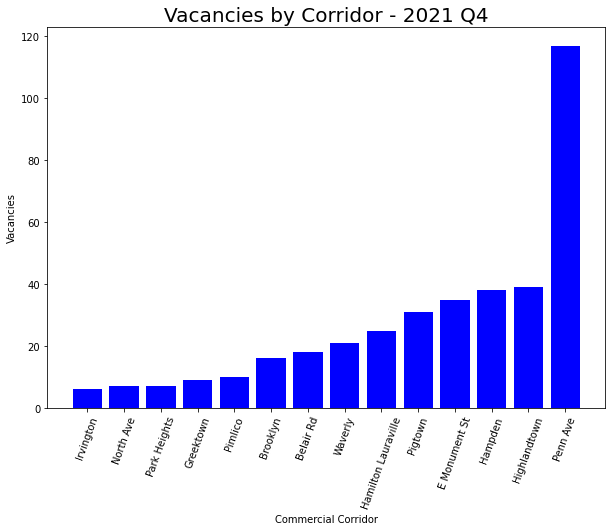

In [54]:
# Create a bar chart to show vacancies for each corridor for 2021 Q4

corr = balt_aggQ4['Corridor']
vac_under24mos = balt_aggQ4['Business vacancies <24 months']
vac_greater24mos = balt_aggQ4['Business vacancies >24 months']

fig = plt.figure(figsize=(10,7))

# Sort the bar chart from corridor with lowest population to highest
df_sorted = balt_aggQ4.sort_values('Business vacancies <24 months')
plt.bar('Corridor', 'Business vacancies <24 months', data=df_sorted, color = 'blue')

# Rotate labels of the x axis so they're easier to read
plt.xticks(rotation=70)

#x-axis labels 
plt.xlabel('Commercial Corridor') 

#y-axis labels 
plt.ylabel('Vacancies') 

#plot title 
plt.title('Vacancies by Corridor - 2021 Q4', size=20) 

plt.show()

In [55]:
# Merge the dataframes together based on the Corridor 
mergeQ1_Q4 = pd.merge(balt_aggQ4, balt_aggQ1, on="Corridor")
mergeQ1_Q4

,Corridor,Business vacancies <24 months_x,Business vacancies >24 months_x,Business no-stat <24 months_x,Business no-stat >24 months_x,Year_x,Business vacancies <24 months_y,Business vacancies >24 months_y,Business no-stat <24 months_y,Business no-stat >24 months_y,Year_y
0,Belair Rd,18,43,206,207,2021,17,49,204,201,2021
1,Brooklyn,16,94,323,300,2021,12,95,303,301,2021
2,E Monument St,35,141,359,379,2021,138,732,2386,2206,2021
3,Greektown,9,27,192,201,2021,25,40,218,204,2021
4,Hamilton Lauraville,25,107,383,369,2021,28,99,396,392,2021
5,Hampden,38,80,181,163,2021,36,106,372,391,2021
6,Highlandtown,39,91,318,332,2021,48,131,495,345,2021
7,Irvington,6,44,111,112,2021,11,39,111,113,2021
8,North Ave,7,109,174,173,2021,5,107,177,178,2021
9,Park Heights,7,41,172,170,2021,10,36,172,174,2021


In [56]:
# Rename columns so that they are more easily understood
mergeQ1_Q4 = mergeQ1_Q4.rename(columns={"Business vacancies <24 months_x": "Q4 Business vacancies <24 months", 
                              "Business vacancies >24 months_x": "Q4 Business vacancies >24 months", 
                              "Business no-stat <24 months_x":"Q4 Business no-stat <24 months", 
                              "Business no-stat >24 months_x":"Q4 Business no-stat >24 months",
                              "Business vacancies <24 months_y": "Q1 Business vacancies <24 months", 
                              "Business vacancies >24 months_y": "Q1 Business vacancies >24 months",
                              "Business no-stat <24 months_y":"Q1 Business no-stat <24 months", 
                              "Business no-stat >24 months_y":"Q1 Business no-stat >24 months",
                              "Year_y": "Year"
                             })


mergeQ1_Q4 = mergeQ1_Q4.drop(["Year_x"], axis=1)
mergeQ1_Q4

,Corridor,Q4 Business vacancies <24 months,Q4 Business vacancies >24 months,Q4 Business no-stat <24 months,Q4 Business no-stat >24 months,Q1 Business vacancies <24 months,Q1 Business vacancies >24 months,Q1 Business no-stat <24 months,Q1 Business no-stat >24 months,Year
0,Belair Rd,18,43,206,207,17,49,204,201,2021
1,Brooklyn,16,94,323,300,12,95,303,301,2021
2,E Monument St,35,141,359,379,138,732,2386,2206,2021
3,Greektown,9,27,192,201,25,40,218,204,2021
4,Hamilton Lauraville,25,107,383,369,28,99,396,392,2021
5,Hampden,38,80,181,163,36,106,372,391,2021
6,Highlandtown,39,91,318,332,48,131,495,345,2021
7,Irvington,6,44,111,112,11,39,111,113,2021
8,North Ave,7,109,174,173,5,107,177,178,2021
9,Park Heights,7,41,172,170,10,36,172,174,2021


In [57]:
# Merge the dataframes together based on the Corridor 
mergeQ2_Q3 = pd.merge(balt_aggQ2, balt_aggQ3, on="Corridor")
mergeQ2_Q3

,Corridor,Business vacancies <24 months_x,Business vacancies >24 months_x,Business no-stat <24 months_x,Business no-stat >24 months_x,Year_x,Business vacancies <24 months_y,Business vacancies >24 months_y,Business no-stat <24 months_y,Business no-stat >24 months_y,Year_y
0,Belair Rd,17,55,208,208,2021,4,17,194,199,2021
1,Brooklyn,17,94,327,305,2021,17,82,282,281,2021
2,E Monument St,132,744,2389,2252,2021,119,740,2279,2305,2021
3,Greektown,26,41,218,206,2021,9,29,207,209,2021
4,Hamilton Lauraville,27,100,392,387,2021,26,99,383,373,2021
5,Hampden,36,106,383,385,2021,36,84,177,164,2021
6,Highlandtown,46,145,360,332,2021,37,90,354,339,2021
7,Irvington,10,39,117,118,2021,9,40,115,118,2021
8,North Ave,7,107,178,179,2021,9,107,173,174,2021
9,Park Heights,10,38,180,178,2021,7,41,172,170,2021


In [58]:
# Rename columns so that they are more easily understood
mergeQ2_Q3 = mergeQ2_Q3.rename(columns={"Business vacancies <24 months_x": "Q2 Business vacancies <24 months", 
                              "Business vacancies >24 months_x": "Q2 Business vacancies >24 months", 
                              "Business no-stat <24 months_x":"Q2 Business no-stat <24 months", 
                              "Business no-stat >24 months_x":"Q2 Business no-stat >24 months",
                              "Business vacancies <24 months_y": "Q3 Business vacancies <24 months", 
                              "Business vacancies >24 months_y": "Q3 Business vacancies >24 months",
                              "Business no-stat <24 months_y":"Q3 Business no-stat <24 months", 
                              "Business no-stat >24 months_y":"Q3 Business no-stat >24 months",
                              "Year_y": "Year"
                             })

mergeQ2_Q3.columns


Index(['Corridor', 'Q2 Business vacancies <24 months',
       'Q2 Business vacancies >24 months', 'Q2 Business no-stat <24 months',
       'Q2 Business no-stat >24 months', 'Year_x',
       'Q3 Business vacancies <24 months', 'Q3 Business vacancies >24 months',
       'Q3 Business no-stat <24 months', 'Q3 Business no-stat >24 months',
       'Year'],
      dtype='object')

In [59]:
mergeQ2_Q3 = mergeQ2_Q3.drop(["Year_x"], axis=1)
mergeQ2_Q3

,Corridor,Q2 Business vacancies <24 months,Q2 Business vacancies >24 months,Q2 Business no-stat <24 months,Q2 Business no-stat >24 months,Q3 Business vacancies <24 months,Q3 Business vacancies >24 months,Q3 Business no-stat <24 months,Q3 Business no-stat >24 months,Year
0,Belair Rd,17,55,208,208,4,17,194,199,2021
1,Brooklyn,17,94,327,305,17,82,282,281,2021
2,E Monument St,132,744,2389,2252,119,740,2279,2305,2021
3,Greektown,26,41,218,206,9,29,207,209,2021
4,Hamilton Lauraville,27,100,392,387,26,99,383,373,2021
5,Hampden,36,106,383,385,36,84,177,164,2021
6,Highlandtown,46,145,360,332,37,90,354,339,2021
7,Irvington,10,39,117,118,9,40,115,118,2021
8,North Ave,7,107,178,179,9,107,173,174,2021
9,Park Heights,10,38,180,178,7,41,172,170,2021


In [60]:
# Merge the dataframes together based on the Corridor 
merge_allQs = pd.merge(mergeQ1_Q4, mergeQ2_Q3, on="Corridor")
merge_allQs = merge_allQs.drop(["Year_x"], axis=1)
merge_allQs = merge_allQs.rename(columns={"Year_y": "Year"
                                         })
merge_allQs

,Corridor,Q4 Business vacancies <24 months,Q4 Business vacancies >24 months,Q4 Business no-stat <24 months,Q4 Business no-stat >24 months,Q1 Business vacancies <24 months,Q1 Business vacancies >24 months,Q1 Business no-stat <24 months,Q1 Business no-stat >24 months,Q2 Business vacancies <24 months,Q2 Business vacancies >24 months,Q2 Business no-stat <24 months,Q2 Business no-stat >24 months,Q3 Business vacancies <24 months,Q3 Business vacancies >24 months,Q3 Business no-stat <24 months,Q3 Business no-stat >24 months,Year
0,Belair Rd,18,43,206,207,17,49,204,201,17,55,208,208,4,17,194,199,2021
1,Brooklyn,16,94,323,300,12,95,303,301,17,94,327,305,17,82,282,281,2021
2,E Monument St,35,141,359,379,138,732,2386,2206,132,744,2389,2252,119,740,2279,2305,2021
3,Greektown,9,27,192,201,25,40,218,204,26,41,218,206,9,29,207,209,2021
4,Hamilton Lauraville,25,107,383,369,28,99,396,392,27,100,392,387,26,99,383,373,2021
5,Hampden,38,80,181,163,36,106,372,391,36,106,383,385,36,84,177,164,2021
6,Highlandtown,39,91,318,332,48,131,495,345,46,145,360,332,37,90,354,339,2021
7,Irvington,6,44,111,112,11,39,111,113,10,39,117,118,9,40,115,118,2021
8,North Ave,7,109,174,173,5,107,177,178,7,107,178,179,9,107,173,174,2021
9,Park Heights,7,41,172,170,10,36,172,174,10,38,180,178,7,41,172,170,2021


In [61]:
merge_allQs.describe()

,Q4 Business vacancies <24 months,Q4 Business vacancies >24 months,Q4 Business no-stat <24 months,Q4 Business no-stat >24 months,Q1 Business vacancies <24 months,Q1 Business vacancies >24 months,Q1 Business no-stat <24 months,Q1 Business no-stat >24 months,Q2 Business vacancies <24 months,Q2 Business vacancies >24 months,Q2 Business no-stat <24 months,Q2 Business no-stat >24 months,Q3 Business vacancies <24 months,Q3 Business vacancies >24 months,Q3 Business no-stat <24 months,Q3 Business no-stat >24 months
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,27.071429,114.857143,330.642857,324.571429,38.142857,163.142857,502.785714,477.500000,37.714286,167.00000,497.071429,481.071429,31.928571,152.642857,448.142857,445.000000
std,28.475264,83.595967,260.080049,240.224803,40.342490,183.086721,596.937721,550.538862,39.372830,186.25293,597.648529,561.927926,37.236178,186.261440,558.613098,564.082373
min,6.000000,27.000000,111.000000,112.000000,5.000000,36.000000,111.000000,113.000000,7.000000,38.00000,117.000000,118.000000,4.000000,17.000000,115.000000,118.000000
25%,9.250000,53.000000,183.750000,180.000000,13.250000,60.500000,207.500000,201.750000,17.000000,64.75000,210.500000,206.500000,9.000000,51.250000,181.250000,180.250000
50%,19.500000,100.500000,254.500000,262.000000,26.000000,106.500000,286.000000,293.500000,25.500000,106.50000,297.500000,296.000000,17.500000,94.500000,274.000000,274.000000
75%,34.000000,139.250000,350.000000,359.750000,35.250000,168.750000,470.250000,391.750000,35.250000,171.25000,389.750000,386.500000,34.750000,155.250000,375.750000,364.500000
max,117.000000,353.000000,1140.000000,1056.000000,138.000000,732.000000,2386.000000,2206.000000,132.000000,744.00000,2389.000000,2252.000000,119.000000,740.000000,2279.000000,2305.000000


In [62]:
merge_allQs_2021 = merge_allQs
merge_allQs_2021

,Corridor,Q4 Business vacancies <24 months,Q4 Business vacancies >24 months,Q4 Business no-stat <24 months,Q4 Business no-stat >24 months,Q1 Business vacancies <24 months,Q1 Business vacancies >24 months,Q1 Business no-stat <24 months,Q1 Business no-stat >24 months,Q2 Business vacancies <24 months,Q2 Business vacancies >24 months,Q2 Business no-stat <24 months,Q2 Business no-stat >24 months,Q3 Business vacancies <24 months,Q3 Business vacancies >24 months,Q3 Business no-stat <24 months,Q3 Business no-stat >24 months,Year
0,Belair Rd,18,43,206,207,17,49,204,201,17,55,208,208,4,17,194,199,2021
1,Brooklyn,16,94,323,300,12,95,303,301,17,94,327,305,17,82,282,281,2021
2,E Monument St,35,141,359,379,138,732,2386,2206,132,744,2389,2252,119,740,2279,2305,2021
3,Greektown,9,27,192,201,25,40,218,204,26,41,218,206,9,29,207,209,2021
4,Hamilton Lauraville,25,107,383,369,28,99,396,392,27,100,392,387,26,99,383,373,2021
5,Hampden,38,80,181,163,36,106,372,391,36,106,383,385,36,84,177,164,2021
6,Highlandtown,39,91,318,332,48,131,495,345,46,145,360,332,37,90,354,339,2021
7,Irvington,6,44,111,112,11,39,111,113,10,39,117,118,9,40,115,118,2021
8,North Ave,7,109,174,173,5,107,177,178,7,107,178,179,9,107,173,174,2021
9,Park Heights,7,41,172,170,10,36,172,174,10,38,180,178,7,41,172,170,2021


In [63]:
# Export file as a CSV, without the Pandas index, but with the header
# Do not run this last code block until you have all previous code blocks in their final form:

merge_allQs_2021.to_csv("merge_2021.csv", index = False, header=True)

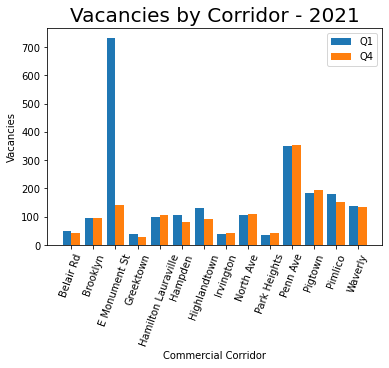

In [64]:
# Create a bar chart to show vacancies for each corridor for 2021 Q4 & Q1

corr = mergeQ1_Q4['Corridor']
vac_Q1 = mergeQ1_Q4['Q1 Business vacancies >24 months']
vac_Q4 = mergeQ1_Q4['Q4 Business vacancies >24 months']

x_axis = np.arange(len(corr))   # label locations
width = 0.35   # width of the bars


plt.bar(x_axis -0.2, vac_Q1, width=0.4, label="Q1")
plt.bar(x_axis +0.2, vac_Q4, width=0.4, label="Q4")

# Rotate labels of the x axis so they're easier to read
plt.xticks(rotation=70)

#x-axis labels 
plt.xlabel('Commercial Corridor') 

#y-axis labels 
plt.ylabel('Vacancies') 

#plot title 
plt.title('Vacancies by Corridor - 2021', size=20) 

plt.xticks(x_axis, corr)
plt.legend()

plt.show()